In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import control
import matplotlib.pyplot as plt

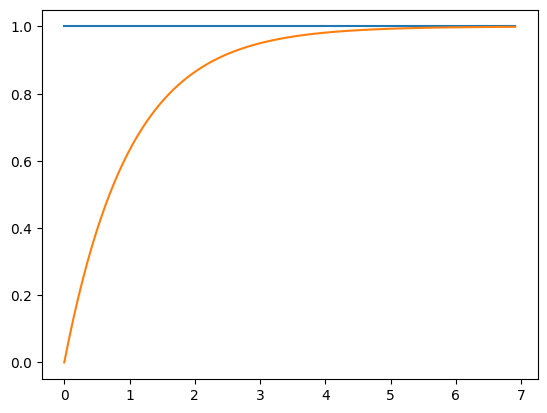

TransferFunction(array([1]), array([1, 1]))

{'RiseTime': 2.1630344812974367, 'SettlingTime': 3.9771924333533515, 'SettlingMin': 0.9, 'SettlingMax': 1.0, 'Overshoot': 0, 'Undershoot': 0, 'Peak': 0.9989999999999999, 'PeakTime': 6.907755278982137, 'SteadyStateValue': 1.0}


In [20]:
tf = control.tf([1], [1, 1])
step = control.step_response(tf)
pd.Series(step.inputs, index=step.time).plot()
pd.Series(step.outputs, index=step.time).plot()
plt.show()
display(tf)
print(control.step_info(tf))

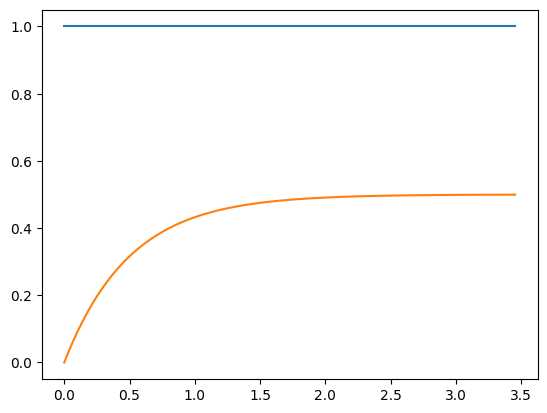

TransferFunction(array([1]), array([1, 2]))

{'RiseTime': 1.0815172406487183, 'SettlingTime': 1.9885962166766757, 'SettlingMin': 0.45, 'SettlingMax': 0.5, 'Overshoot': 0, 'Undershoot': 0, 'Peak': 0.49949999999999994, 'PeakTime': 3.4538776394910684, 'SteadyStateValue': 0.5}


In [23]:
plot_print_tf(control.tf([1], [1, 1]))

In [29]:
from timeit import timeit
timeit(lambda: control.step_info(control.tf([1], [1, 1])), number=10000)

37.5972644998692

In [30]:
def get_poles(tf):
    poli = tf[1]
    s = sp.Symbol('s')
    res = sp.solve(sum([scalar*(s**potency) for potency, scalar in reversed(list(enumerate(reversed(poli))))]), s)
    return res

In [77]:
Kp = sp.Symbol('Kp')
Ki = sp.Symbol('Ki')
poles = get_poles([[1], [1,Kp +3,2*Ki]])
for pole in poles:
    interval: sp.Interval = sp.solve_univariate_inequality(pole < 0, Kp, relational=False)
    display(interval)
    print(interval.start)
    print(interval.end)
    print(100 < interval.end)


NotImplementedError: 
The inequality, -8*Ki + x**2 + 6*x + 9 >= 0, cannot be solved using
solve_univariate_inequality.